In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/rafeshankar/Powerlifting-Analysis/main/cleaned_data')

#Summary Statistics

In [4]:
df.head()

,lifter_name,age,weight_class,amount_lifted,lift_type_bench_press,lift_type_deadlift,lift_type_squat,gender
0,Jessica Wilson,46,59,269,True,False,False,female
1,John Doe,60,83,179,True,False,False,male
2,Emily Davis,41,105,235,True,False,False,female
3,Emily Davis,33,66,359,False,False,True,female
4,Laura Taylor,56,74,221,False,True,False,female


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lifter_name            2999 non-null   object
 1   age                    2999 non-null   int64 
 2   weight_class           2999 non-null   int64 
 3   amount_lifted          2999 non-null   int64 
 4   lift_type_bench_press  2999 non-null   bool  
 5   lift_type_deadlift     2999 non-null   bool  
 6   lift_type_squat        2999 non-null   bool  
 7   gender                 2999 non-null   object
dtypes: bool(3), int64(3), object(2)
memory usage: 126.1+ KB


In [6]:
df.describe(include='all')

,lifter_name,age,weight_class,amount_lifted,lift_type_bench_press,lift_type_deadlift,lift_type_squat,gender
count,2999,2999.000000,2999.000000,2999.000000,2999,2999,2999,2999
unique,10,NaN,NaN,NaN,2,2,2,2
top,Emily Davis,NaN,NaN,NaN,False,False,False,female
freq,333,NaN,NaN,NaN,1988,1975,2035,1532
mean,NaN,41.070357,95.384795,250.377459,NaN,NaN,NaN,NaN
std,NaN,13.680478,43.502662,86.260703,NaN,NaN,NaN,NaN
min,NaN,18.000000,52.000000,100.000000,NaN,NaN,NaN,NaN
25%,NaN,29.000000,66.000000,177.000000,NaN,NaN,NaN,NaN
50%,NaN,41.000000,83.000000,250.000000,NaN,NaN,NaN,NaN
75%,NaN,53.000000,105.000000,325.500000,NaN,NaN,NaN,NaN


#Univariate Analysis

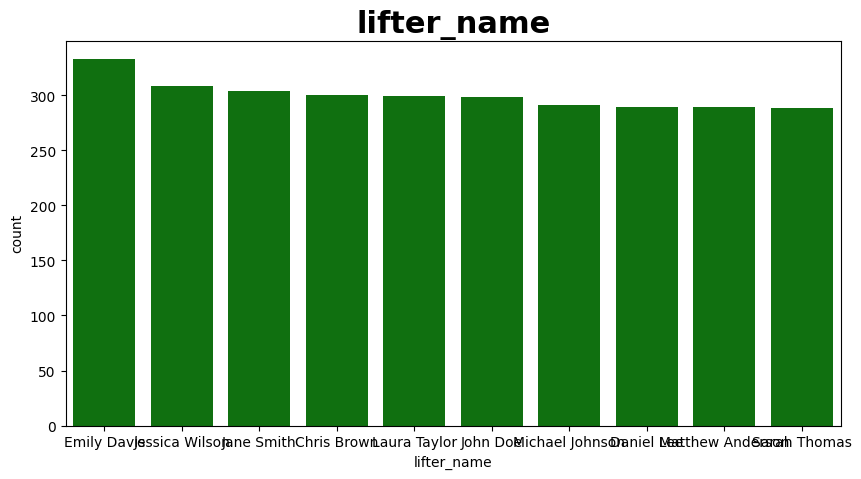

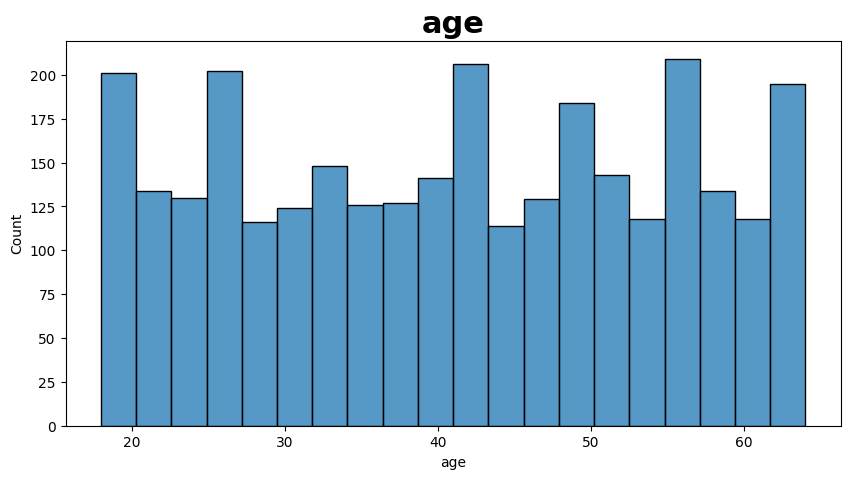

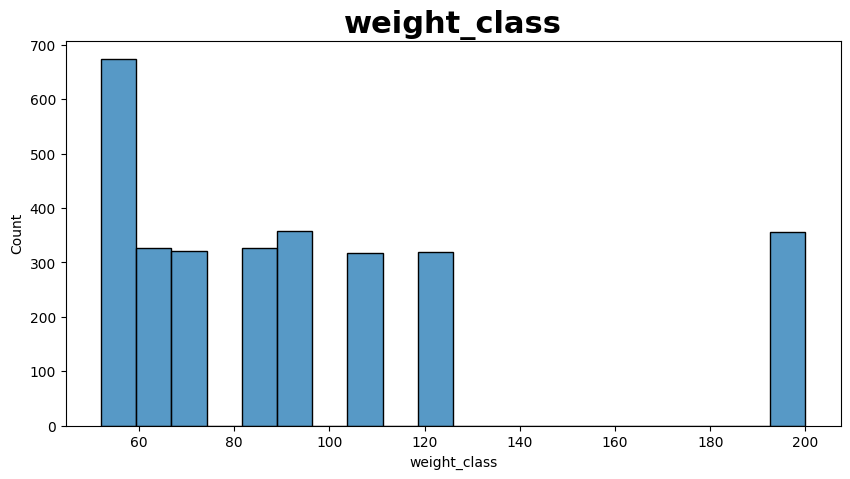

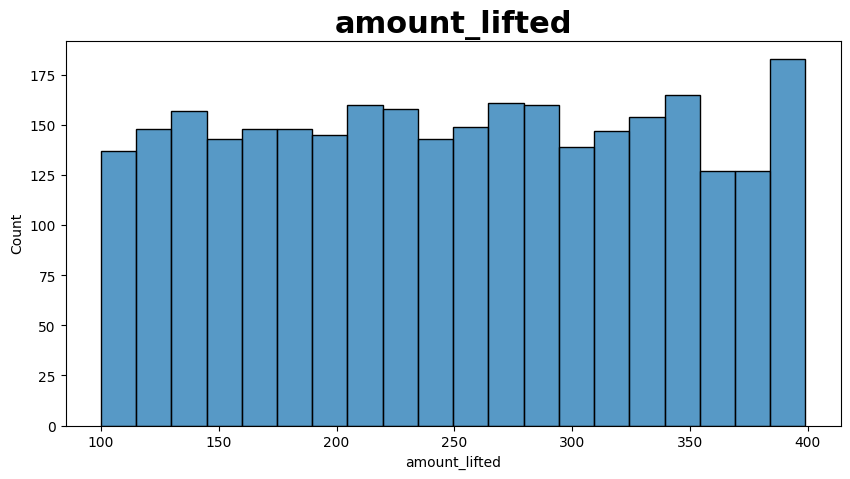

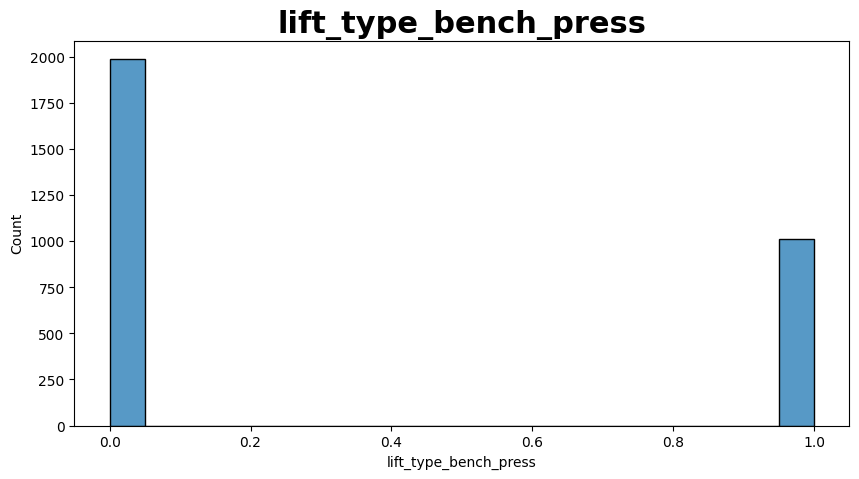

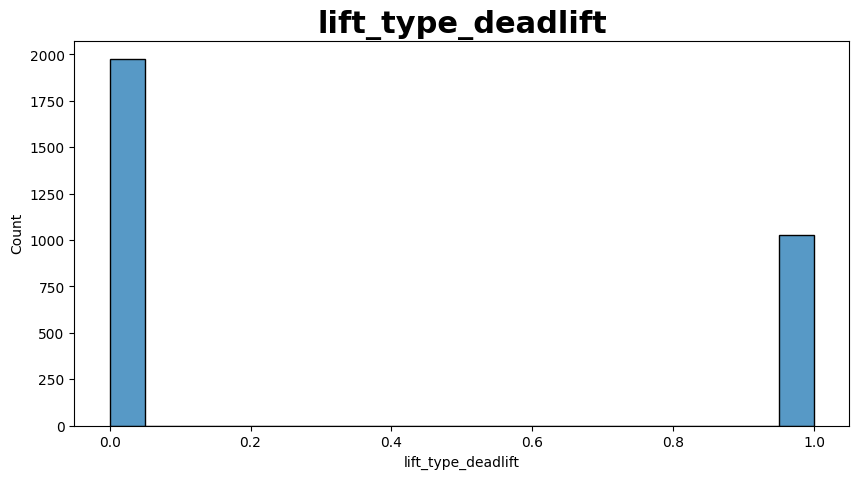

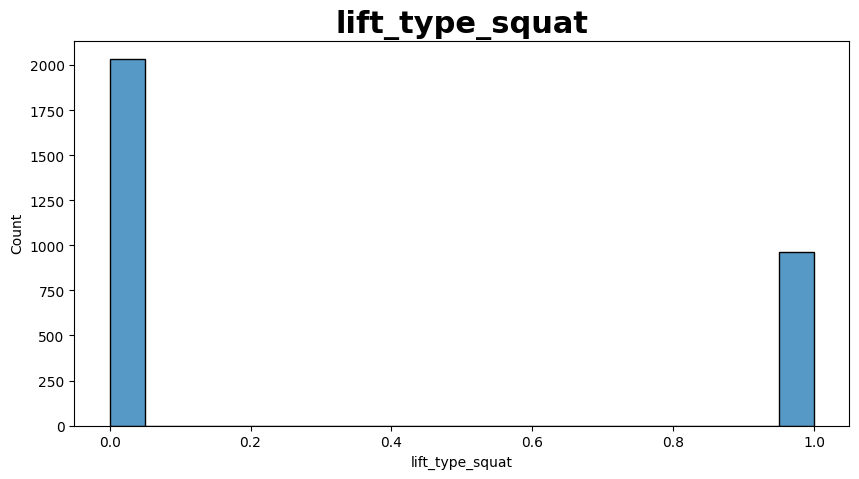

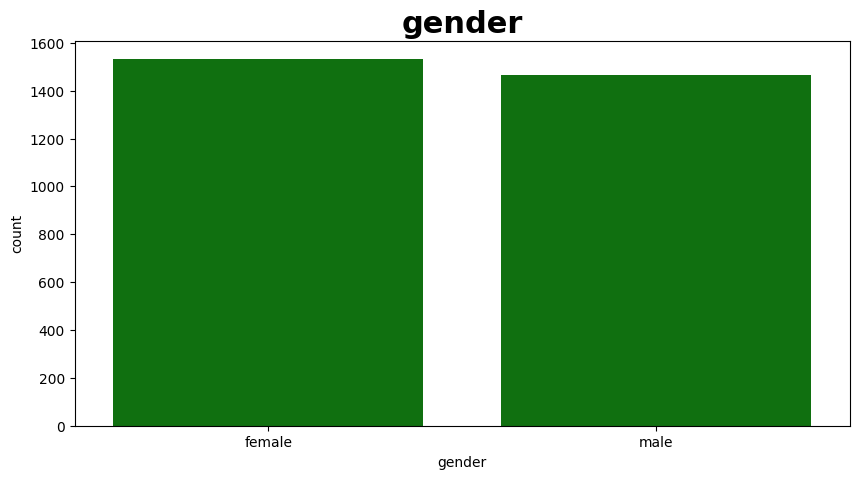

In [7]:
for feat in df.columns:
  plt.figure(figsize = (10,5))
  if df[feat].dtype == 'object':
    order = df[feat].value_counts().index
    sns.countplot(data = df,
                  x = feat,
                  order = order,
                  color = 'green')
  else:
    sns.histplot(data = df,
                 x = feat,
                 bins = 20)
  plt.title(feat, fontsize = 22, fontweight= 'bold')

#Bivariate Analysis

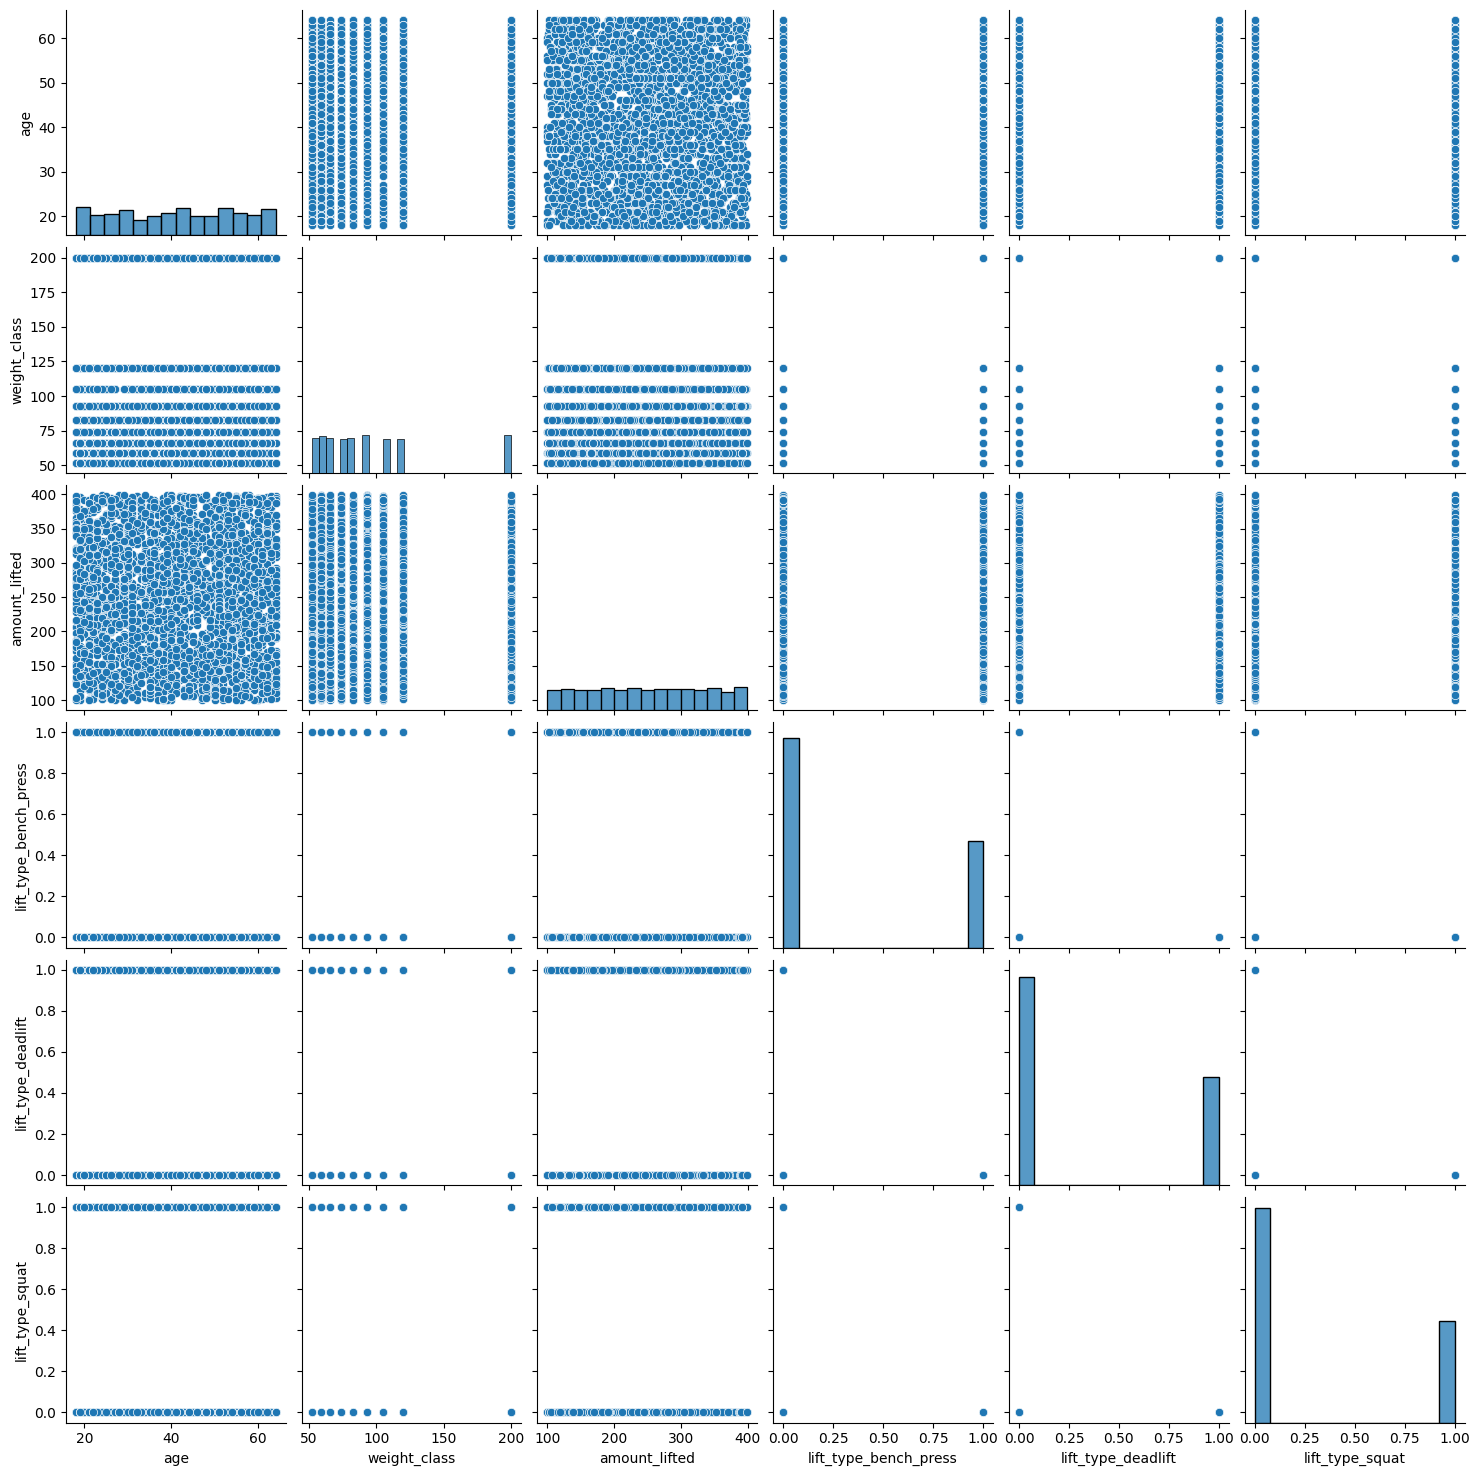

In [8]:
sns.pairplot(df)

<Axes: >

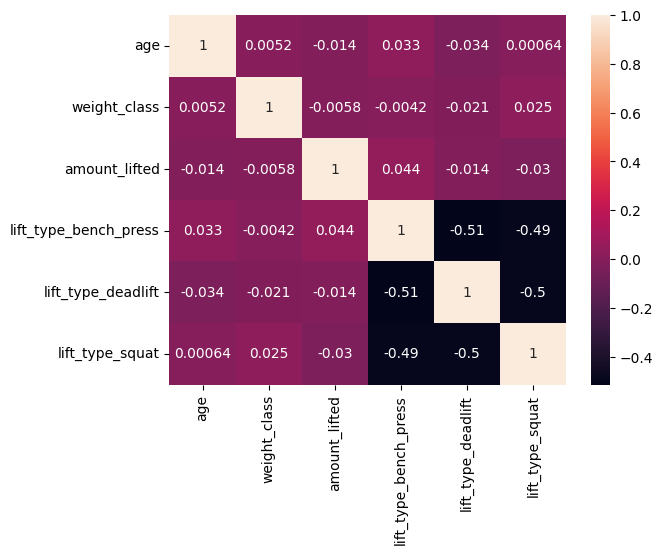

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

#Amount Lifted by Lift Type

In [15]:
df['age_bins'] = pd.qcut(df['age'], q = 5, labels=['mid 20s','mid 30s','mid 40s','mid 50s','mid 60s'])

In [16]:
dfd = df[df['lift_type_deadlift'] == True]
dfbp = df[df['lift_type_bench_press'] == True]
dfs = df[df['lift_type_squat'] == True]

In [17]:
liftsdf_names = ['Deadlift', 'Bench Press', 'Squat']

##Age

In [18]:
df['age_bins'].value_counts().sort_values()

,count
age_bins,
mid 30s,571
mid 50s,574
mid 60s,591
mid 40s,596
mid 20s,667


###Deadlift

<ipython-input-20-9ab31b2b2d13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['age_bins'] = pd.Categorical(dfd['age_bins'], categories=mean_values_sorted.index, ordered=True)


Text(0, 0.5, 'Age Bins')

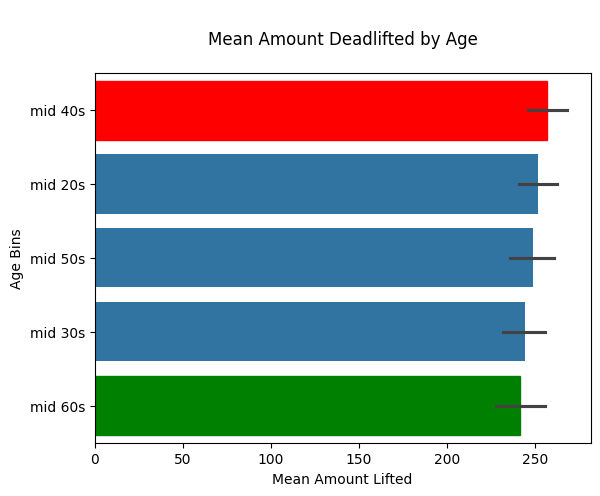

In [20]:
mean_values_sorted = dfd.groupby('age_bins', observed=True)['amount_lifted'].mean().sort_values(ascending=False)

min_day = mean_values_sorted.idxmin()
max_day = mean_values_sorted.idxmax()

dfd['age_bins'] = pd.Categorical(dfd['age_bins'], categories=mean_values_sorted.index, ordered=True)

ax = sns.barplot(
    data=dfd,
    y='age_bins',
    x='amount_lifted',
    order=mean_values_sorted.index
)

for bar, label in zip(ax.patches, mean_values_sorted.index):
    if label == min_day:
        bar.set_color('green')
    elif label == max_day:
        bar.set_color('red')

plt.title('\nMean Amount Deadlifted by Age\n')
plt.xlabel('Mean Amount Lifted')
plt.ylabel('Age Bins')

###Benchpress

<ipython-input-21-fc1eb0520721>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbp['age_bins'] = pd.Categorical(dfbp['age_bins'], categories=mean_values_sorted.index, ordered=True)


Text(0, 0.5, 'Age Bins')

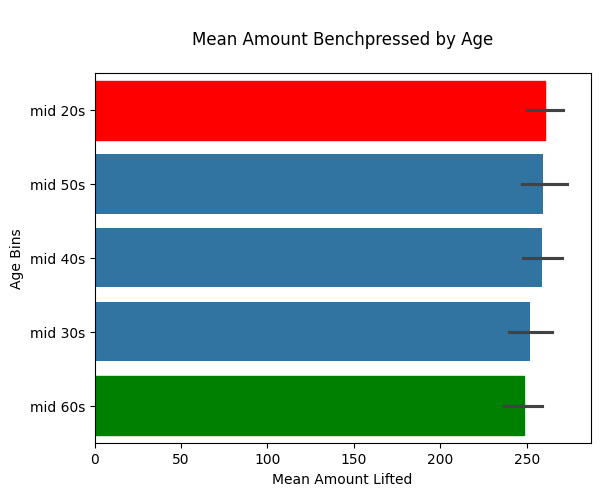

In [21]:
mean_values_sorted = dfbp.groupby('age_bins', observed=True)['amount_lifted'].mean().sort_values(ascending=False)

min_day = mean_values_sorted.idxmin()
max_day = mean_values_sorted.idxmax()

dfbp['age_bins'] = pd.Categorical(dfbp['age_bins'], categories=mean_values_sorted.index, ordered=True)

ax = sns.barplot(
    data=dfbp,
    y='age_bins',
    x='amount_lifted',
    order=mean_values_sorted.index
)

for bar, label in zip(ax.patches, mean_values_sorted.index):
    if label == min_day:
        bar.set_color('green')
    elif label == max_day:
        bar.set_color('red')

plt.title('\nMean Amount Benchpressed by Age\n')
plt.xlabel('Mean Amount Lifted')
plt.ylabel('Age Bins')

###Squat

<ipython-input-22-13fa3f74a42f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['age_bins'] = pd.Categorical(dfs['age_bins'], categories=mean_values_sorted.index, ordered=True)


Text(0, 0.5, 'Age Bins')

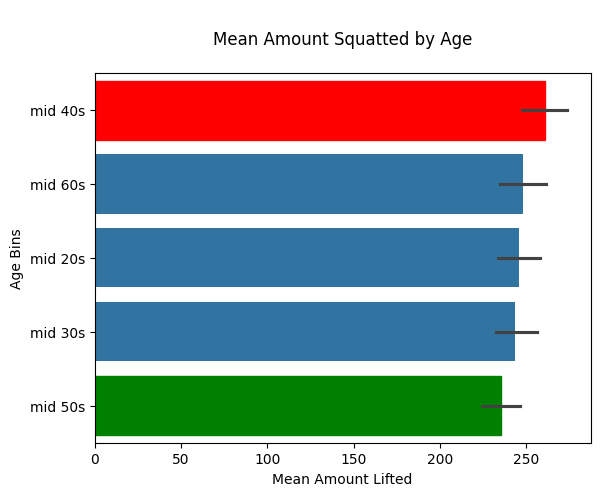

In [22]:
mean_values_sorted = dfs.groupby('age_bins', observed=True)['amount_lifted'].mean().sort_values(ascending=False)

min_day = mean_values_sorted.idxmin()
max_day = mean_values_sorted.idxmax()

dfs['age_bins'] = pd.Categorical(dfs['age_bins'], categories=mean_values_sorted.index, ordered=True)

ax = sns.barplot(
    data=dfs,
    y='age_bins',
    x='amount_lifted',
    order=mean_values_sorted.index
)

for bar, label in zip(ax.patches, mean_values_sorted.index):
    if label == min_day:
        bar.set_color('green')
    elif label == max_day:
        bar.set_color('red')

plt.title('\nMean Amount Squatted by Age\n')
plt.xlabel('Mean Amount Lifted')
plt.ylabel('Age Bins')

##Weight Class

###Deadlift

<ipython-input-23-e43e49838693>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd['weight_class'] = pd.Categorical(dfd['weight_class'], categories=mean_values_sorted.index, ordered=True)


Text(0, 0.5, 'Weight Class')

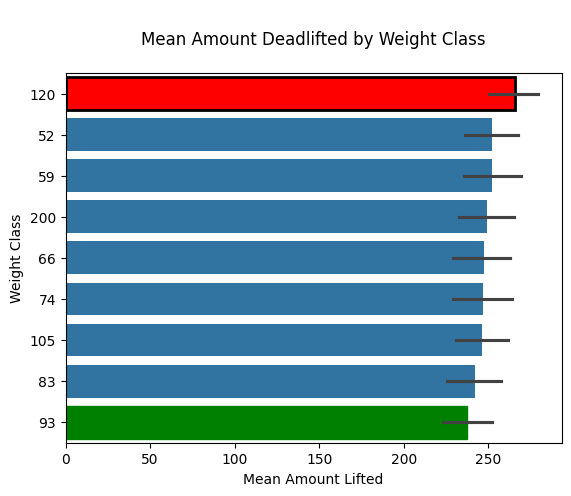

In [23]:
mean_values_sorted = dfd.groupby('weight_class', observed=True)['amount_lifted'].mean().sort_values(ascending=False)

min_day = mean_values_sorted.idxmin()
max_day = mean_values_sorted.idxmax()

dfd['weight_class'] = pd.Categorical(dfd['weight_class'], categories=mean_values_sorted.index, ordered=True)

#plt.figure(figsize = (15,7))

ax = sns.barplot(
    data=dfd,
    y='weight_class',
    x='amount_lifted',
    order=mean_values_sorted.index
)

for bar, label in zip(ax.patches, mean_values_sorted.index):
    if label == min_day:
        bar.set_color('green')
    elif label == max_day:
        bar.set_color('red'),
        bar.set_edgecolor('black'),
        bar.set_linewidth(2)

plt.title('\nMean Amount Deadlifted by Weight Class\n')
plt.xlabel('Mean Amount Lifted')
plt.ylabel('Weight Class')

###Benchpress

<ipython-input-24-6f78450d37f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbp['weight_class'] = pd.Categorical(dfbp['weight_class'], categories=mean_values_sorted.index, ordered=True)


Text(0, 0.5, 'Weight Class')

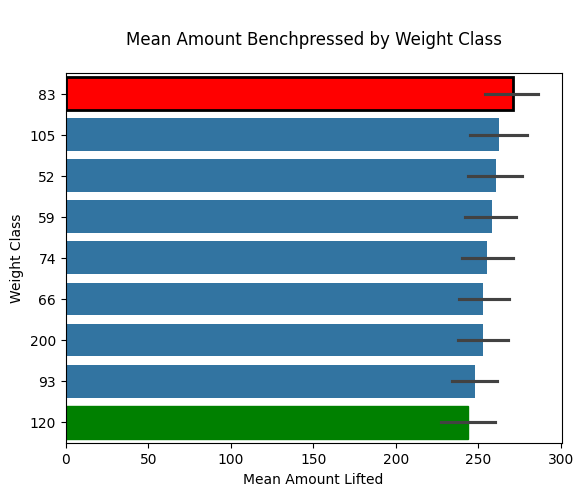

In [24]:
mean_values_sorted = dfbp.groupby('weight_class', observed=True)['amount_lifted'].mean().sort_values(ascending=False)

min_day = mean_values_sorted.idxmin()
max_day = mean_values_sorted.idxmax()

dfbp['weight_class'] = pd.Categorical(dfbp['weight_class'], categories=mean_values_sorted.index, ordered=True)

#plt.figure(figsize = (15,7))

ax = sns.barplot(
    data=dfbp,
    y='weight_class',
    x='amount_lifted',
    order=mean_values_sorted.index
)

for bar, label in zip(ax.patches, mean_values_sorted.index):
    if label == min_day:
        bar.set_color('green')
    elif label == max_day:
        bar.set_color('red'),
        bar.set_edgecolor('black'),
        bar.set_linewidth(2)

plt.title('\nMean Amount Benchpressed by Weight Class\n')
plt.xlabel('Mean Amount Lifted')
plt.ylabel('Weight Class')

###Squat

<ipython-input-25-66cc5adb429f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['weight_class'] = pd.Categorical(dfs['weight_class'], categories=mean_values_sorted.index, ordered=True)


Text(0, 0.5, 'Weight Class')

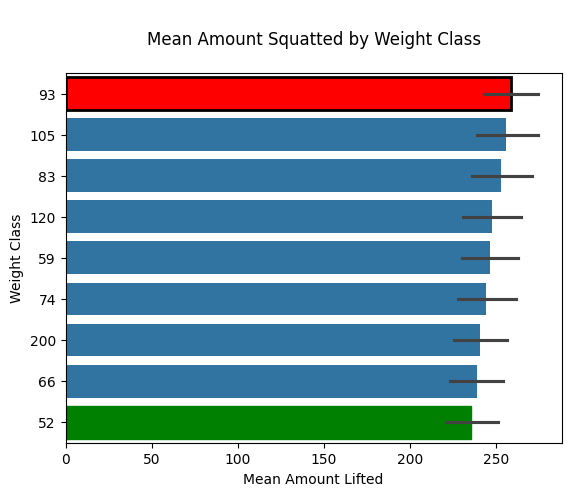

In [25]:
mean_values_sorted = dfs.groupby('weight_class', observed=True)['amount_lifted'].mean().sort_values(ascending=False)

min_day = mean_values_sorted.idxmin()
max_day = mean_values_sorted.idxmax()

dfs['weight_class'] = pd.Categorical(dfs['weight_class'], categories=mean_values_sorted.index, ordered=True)

#plt.figure(figsize = (15,7))

ax = sns.barplot(
    data=dfs,
    y='weight_class',
    x='amount_lifted',
    order=mean_values_sorted.index
)

for bar, label in zip(ax.patches, mean_values_sorted.index):
    if label == min_day:
        bar.set_color('green')
    elif label == max_day:
        bar.set_color('red'),
        bar.set_edgecolor('black'),
        bar.set_linewidth(2)

plt.title('\nMean Amount Squatted by Weight Class\n')
plt.xlabel('Mean Amount Lifted')
plt.ylabel('Weight Class')

##Gender & Age

###Deadlift, Benchpress, Squat amalgamated

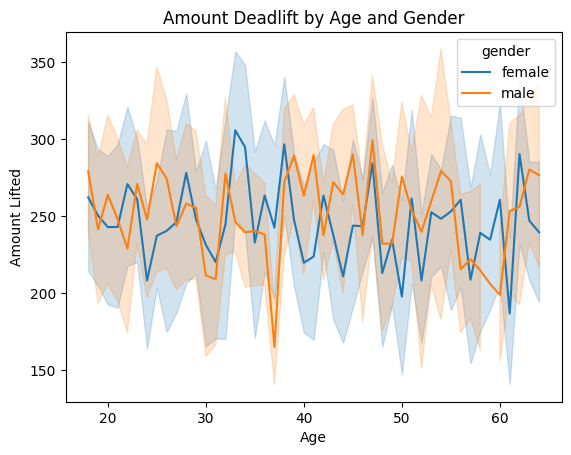

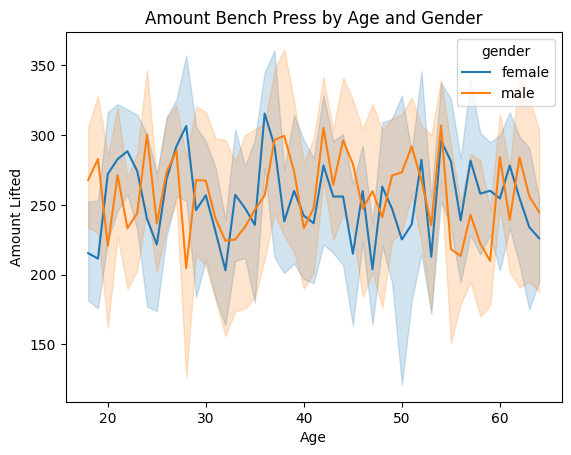

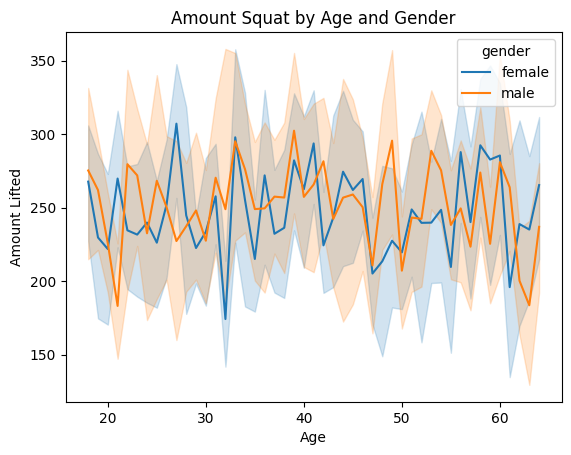

In [27]:
liftsdf = [dfd, dfbp, dfs]

for x, name in zip(liftsdf, liftsdf_names):
  plt.figure()
  sns.lineplot(
      data = x,
      x = 'age',
      y = 'amount_lifted',
      hue = 'gender'
  )

  plt.title(f'Amount {name} by Age and Gender')
  plt.xlabel('Age')
  plt.ylabel('Amount Lifted')
